# Hyperparameters Setup


## Hyperparameters specification

In [1]:

#GPU selection 
information_patches=0.05
filter_Target=True#@param {type:"boolean"}
filter_Source=True#@param {type:"boolean"}
pretrain_model1=True#@param {type:"boolean"}
GPU_availability=True#@param {type:"boolean"}
show_images=False#@param {type:"boolean"}
GPU="1"#Perform and nvidia-smi to check which free gpus are available 
#Parameters to be modified:
plot_history=False#@param {type:"boolean"}
factor=4 #@param {type:"integer"}
noise=0.3 #@param {type:"number"}
factor_patches=1 #@param {type:"integer"}
random_patches=True#@param {type:"boolean"}
# === PreTraining parameters ===
# number of epochs
numEpochsPretrain =  1#@param {type:"integer"}
# patience
patiencePretrain =  1#@param {type:"integer"}
# learning rate
lrPretrain = 5e-4 #@param {type:"number"}
# batch size
batch_size_valuePretrain =  6#@param {type:"integer"}
# use one-cycle policy for super-convergence? Reduce on plateau?
no_schedule = None #@param {type:"raw"}
schedulePretrain = 'oneCycle' #@param [ "no_schedule","'oneCycle'","'reduce'"] {type:"raw"}

# Network architecture: UNet, ResUNet,MobileNetEncoder
model_namePretrain = 'AttentionUNET'#@param ['UNet','MobileNetEncoder','AttentionUNET']
# Optimizer name: 'Adam', 'SGD'
optimizer_namePretrain = 'Adam'#@param ['Adam','SGD']{type:"string"}
# Loss function name: 'BCE', 'Dice', 'W_BCE_Dice'
loss_acronymPretrain = 'mse' #@param ['mae','mse']{type:"string"}
max_poolingPretrain=True #@param {type:"boolean"}

#@title **Training Hyperparameters**

# === Training parameters ===
# number of epochs
numEpochs =  1#@param {type:"integer"}
# patience
patience = 1#@param {type:"integer"}
# learning rate
lr =1e-4#@param {type:"number"}
# batch size
batch_size_value = 5#@param {type:"integer"}
# use one-cycle policy for super-convergence? Reduce on plateau?
schedule = 'oneCycle' #@param [ "no_schedule","'oneCycle'","'reduce'"] {type:"raw"}
# Network architecture: UNet, ResUNet,MobileNetEncoder
model_name = 'AttentionUNET' #@param ['UNet','MobileNetEncoder','AttentionUNET']
# Optimizer name: 'Adam', 'SGD'
optimizer_name = 'Adam' #@param ['Adam','SGD']{type:"string"}
# Loss function name: 'BCE', 'Dice', 'W_BCE_Dice'
loss_acronym = 'BCE' #@param ['BCE','Dice','SEG']{type:"string"}
# create the network and compile it with its optimizer
max_pooling=True #@param {type:"boolean"}

repetitions=1#@param {type:"slider", min:1, max:30, step:1}
train_encoder=False #@param {type:"boolean"}
bottleneck_freezing=False #@param {type:"boolean"}
train_decoder=True


In [2]:
#Select dataset-route {'Lucchi++','Kasthuri++','Achucarro','VNC'}
#
Target='Lucchi++'#@param ['Lucchi++','Kasthuri++','Achucarro','VNC']
Source='Kasthuri++'#@param ['Lucchi++','Kasthuri++','Achucarro','VNC']
noisy_input = False #@param {type:"boolean"}
histogram_matching=True

testName=Target+'_'+Source+'_'+model_name 

#Specify full path for the images
train_input_path1 = '/home/jpastor/Downloads/Datasets/'+Target+'/train/x'
train_label_path1 = '/home/jpastor/Downloads/Datasets/'+Target+'/train/y'
test_input_path1 = '/home/jpastor/Downloads/Datasets/'+Target+'/test/x'
test_label_path1 = '/home/jpastor/Downloads/Datasets/'+Target+'/test/y'

train_input_path2 = '/home/jpastor/Downloads/Datasets/'+Source+'/train/x'
train_label_path2 = '/home/jpastor/Downloads/Datasets/'+Source+'/train/y'
test_input_path2 = '/home/jpastor/Downloads/Datasets/'+Source+'/test/x'
test_label_path2 = '/home/jpastor/Downloads/Datasets/'+Source+'/test/y'

train_input_path1_hm = '/home/jpastor/Downloads/datasets-hist-matching/hist_match/'+Target+'/'+Target+'_s-t_'+Source+'/train/x'
train_label_path1_hm = '/home/jpastor/Downloads/datasets-hist-matching/hist_match/'+Target+'/'+Target+'_s-t_'+Source+'/train/y'
test_input_path1_hm = '/home/jpastor/Downloads/datasets-hist-matching/hist_match/'+Target+'/'+Target+'_s-t_'+Source+'/test/x'
test_label_path1_hm = '/home/jpastor/Downloads/datasets-hist-matching/hist_match/'+Target+'/'+Target+'_s-t_'+Source+'/test/y'

train_input_path2_hm = '/home/jpastor/Downloads/datasets-hist-matching/hist_match/'+Source+'/'+Source+'_s-t_'+Target+'/train/x'
train_label_path2_hm = '/home/jpastor/Downloads/datasets-hist-matching/hist_match/'+Source+'/'+Source+'_s-t_'+Target+'/train/y'
test_input_path2_hm = '/home/jpastor/Downloads/datasets-hist-matching/hist_match/'+Source+'/'+Source+'_s-t_'+Target+'/test/x'
test_label_path2_hm = '/home/jpastor/Downloads/datasets-hist-matching/hist_match/'+Source+'/'+Source+'_s-t_'+Target+'/test/y'

import pandas as pd
import numpy as np
hyperparameters=[['Source','Target','Epochs Pre','patience Pre','lr Pre','batch size Pre','scheduler pre','model','optimizer pre','loss pre','Epochs','Patience','Lr','Batch size','Scheduler','Optimizer','Iterations','Train Encoder','BottleNeck freezing','Train decoder'],[Source,Target,numEpochsPretrain,patiencePretrain,lrPretrain,batch_size_valuePretrain,schedulePretrain,model_name,optimizer_namePretrain,loss_acronymPretrain,numEpochs,patience,lr,batch_size_value,schedule,optimizer_name,repetitions,train_encoder,bottleneck_freezing,train_decoder]]
df=pd.DataFrame(hyperparameters)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header 
print(df)

0      Source    Target Epochs Pre patience Pre  lr Pre batch size Pre  \
1  Kasthuri++  Lucchi++          1            1  0.0005              6   

0 scheduler pre          model optimizer pre loss pre Epochs Patience      Lr  \
1      oneCycle  AttentionUNET          Adam      mse      1        1  0.0001   

0 Batch size Scheduler Optimizer Iterations Train Encoder BottleNeck freezing  \
1          5  oneCycle      Adam          1         False               False   

0 Train decoder  
1          True  


In [3]:

"""# Code Execution
### Imports and folder creation
"""
import sys
import numpy as np
from PIL import Image

from scipy.sparse.construct import rand
sys.path.append('../') #in order to access functions.py 
from functions import *

from tensorflow_examples.models.pix2pix import pix2pix
from scipy.sparse.construct import rand
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np


#gpu selection 
gpu_select(GPU_availability,GPU)

# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# session = tf.Session(config=config)
try:
  os.mkdir(testName)
except:
 print('Already created folder')
 os.chdir(testName)
try:
  os.mkdir('saved_Source_models')
except:
 print('Already created folder')

try:
  os.mkdir('Plots')
except:
 print('Already created folder')

try:
  os.mkdir('Test_predictions')
except:
 print('Already created folder')
try:
  os.mkdir('Prediction2')
except:
 print('Already created folder')

try:
  os.mkdir('Modelos')
except:
 print('Already created folder')
 
modelos_path='Modelos/'+Target+'-'+Source

try:
  os.mkdir(modelos_path)
except:
 print('Already created folder')


GPU:1 was selected
Already created folder
Already created folder
Already created folder
Already created folder
Already created folder
Already created folder
Already created folder


2.4.1
Loading data sets according to style of...Lucchi++
Loading data from /home/jpastor/Downloads/Datasets/Lucchi++/train/x
Dataset input images loaded: 165
Dataset label images loaded: 165
Randomly cropping patches from the original image
Randomly cropping patches from the original image
Loading data from /home/jpastor/Downloads/datasets-hist-matching/hist_match/Kasthuri++/Kasthuri++_s-t_Lucchi++/train/x
Dataset input images loaded: 85
Dataset label images loaded: 85
Randomly cropping patches from the original image
Randomly cropping patches from the original image
Loading data from /home/jpastor/Downloads/Datasets/Lucchi++/test/x
Dataset input images loaded: 165
Dataset label images loaded: 165
Loading data from /home/jpastor/Downloads/datasets-hist-matching/hist_match/Kasthuri++/Kasthuri++_s-t_Lucchi++/test/x
Dataset input images loaded: 75
Dataset label images loaded: 75
Randomly cropping patches from the original image
Randomly cropping patches from the original image
(256, 256, 

/home/jpastor/anaconda3/lib/python3.8/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


PSNR original: inf
SSIM original: 0.5314374319225798

# Generate predictions for all validation samples


<ipython-input-4-e5893bbe5fd2>:296: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  psnr_array.append(metrics.peak_signal_noise_ratio(pred, Y_val[i][:,:,0]));
<ipython-input-4-e5893bbe5fd2>:302: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ssim_array.append(metrics.structural_similarity(pred, Y_val[i][:,:,0]));


PSNR reconstructed: 15.06208852472879
SSIM reconstructed: 0.5832416868346184
predictions shape: (474, 256, 256, 1)
Problem when printing superresolution predictions it requires to use X_train,X_val...
Loading data from /home/jpastor/Downloads/datasets-hist-matching/hist_match/Kasthuri++/Kasthuri++_s-t_Lucchi++/train/x
Dataset input images loaded: 85
Dataset label images loaded: 85
Randomly cropping patches from the original image
Randomly cropping patches from the original image
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
The range of max values is between: 0.7647058823529411 and 0.996078431372549
The range of max values is between: 1.0 and 1.0
The range of max values is between: 0.0 and 0.996078431372549
The range of max values is between: 0.0 and 1.0
Loading data from /home/jpastor/Downloads/Datasets/Lucchi++/test/x
Dataset input images loaded: 165
Dataset label images loaded: 165
(768, 1024, 1)
(768, 1024)
data augmentation: Done!
input_1 False
conv2d False
activation Fa

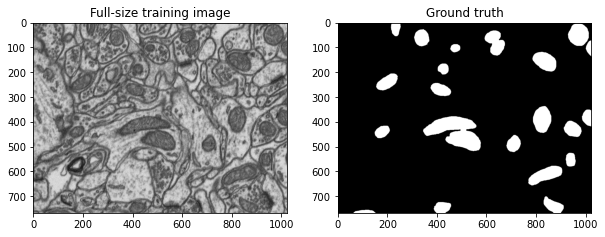

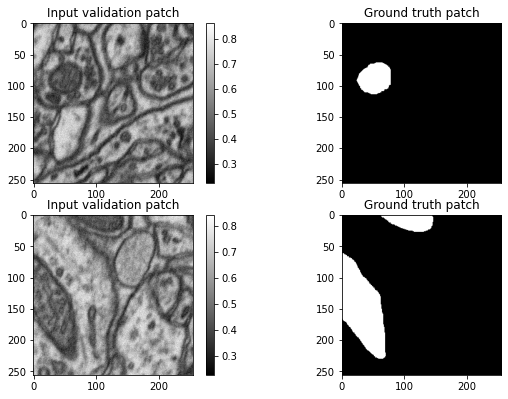

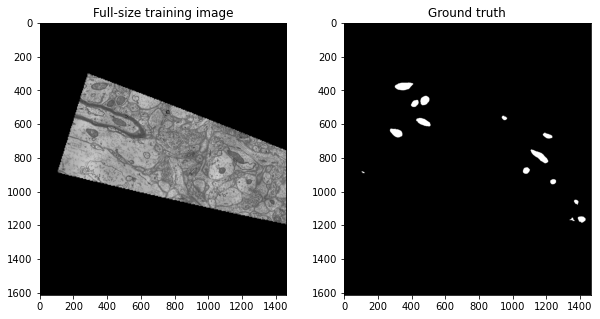

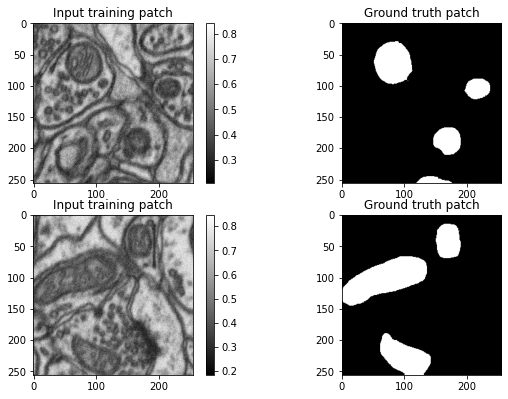

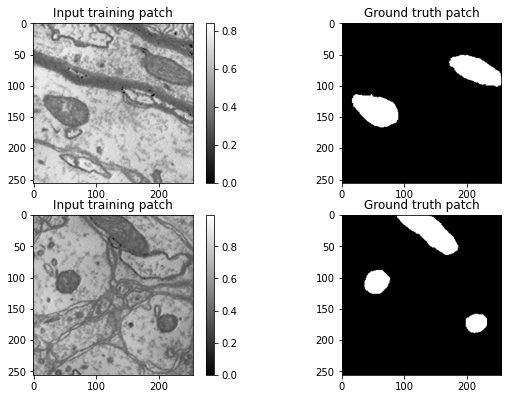

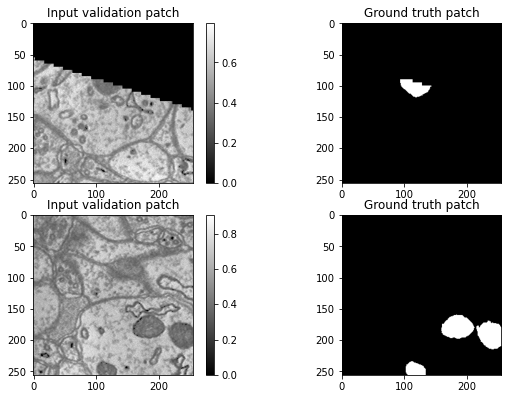

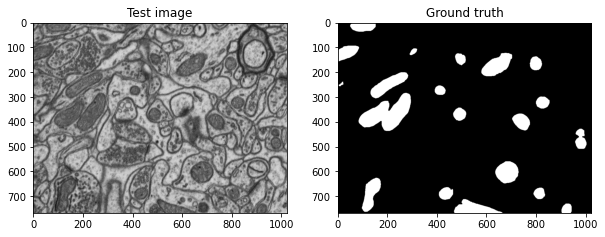

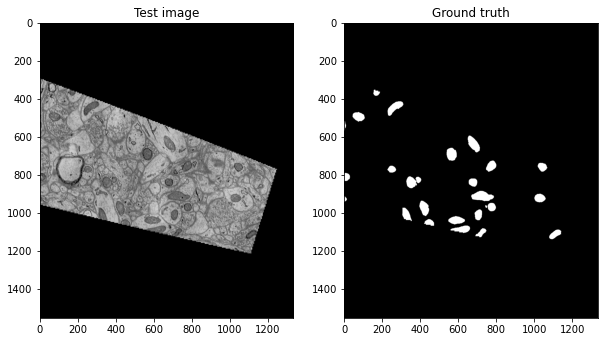

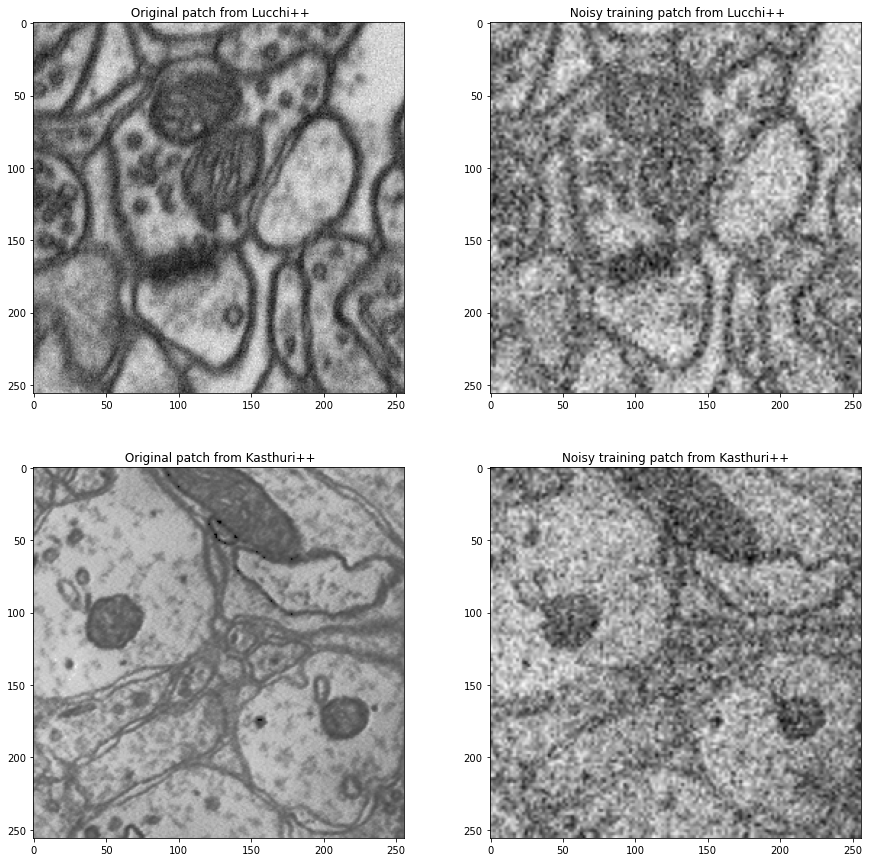

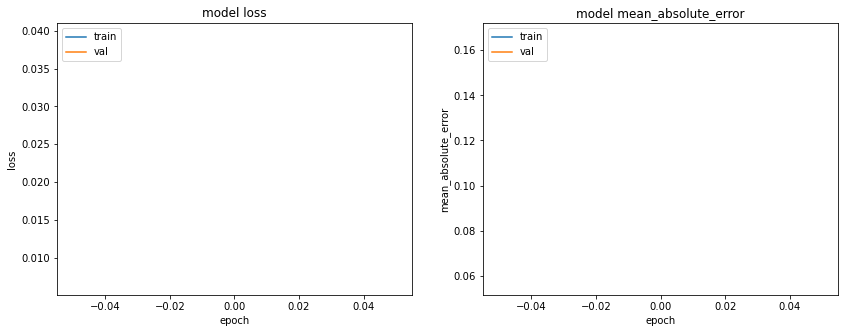

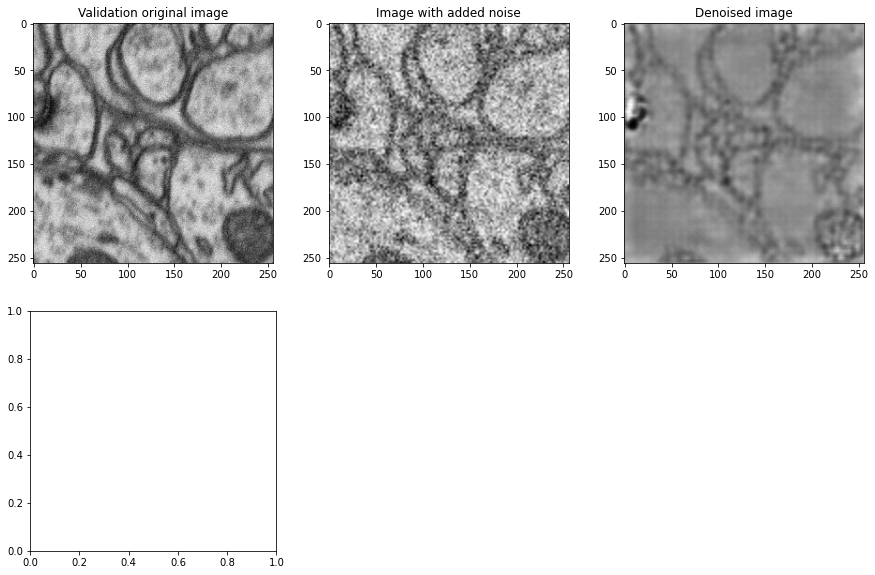

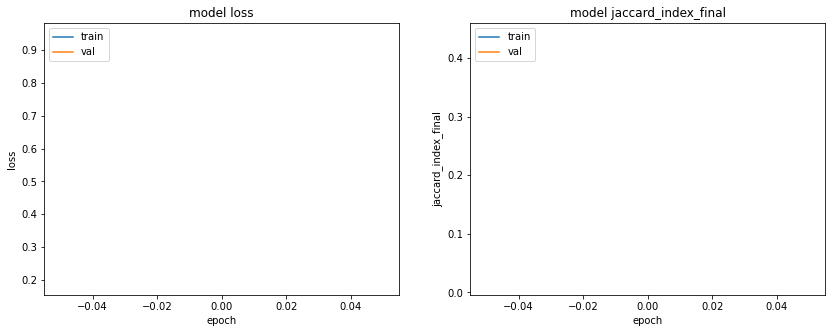

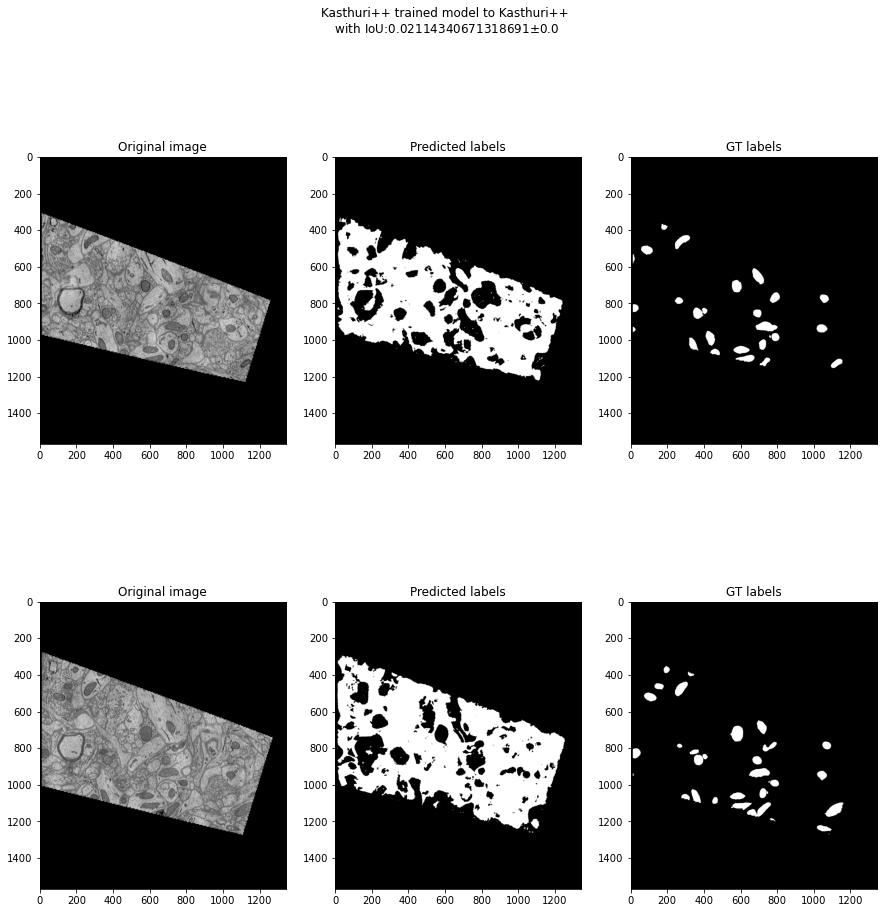

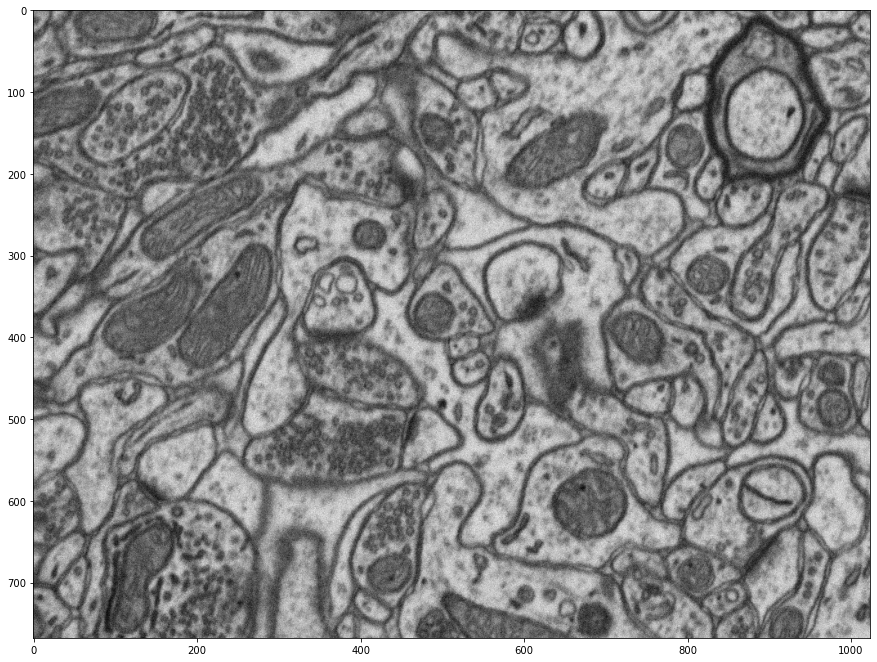

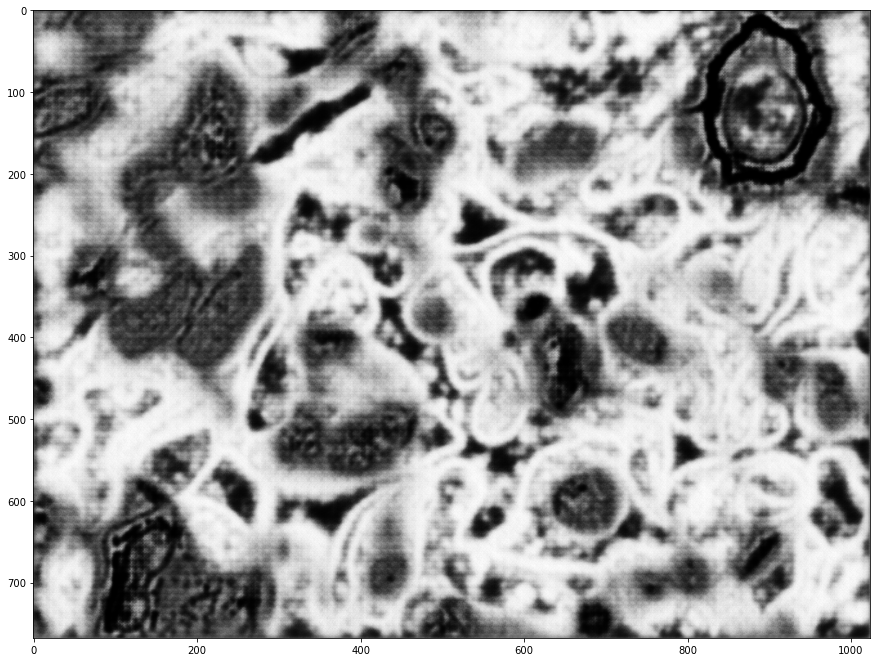

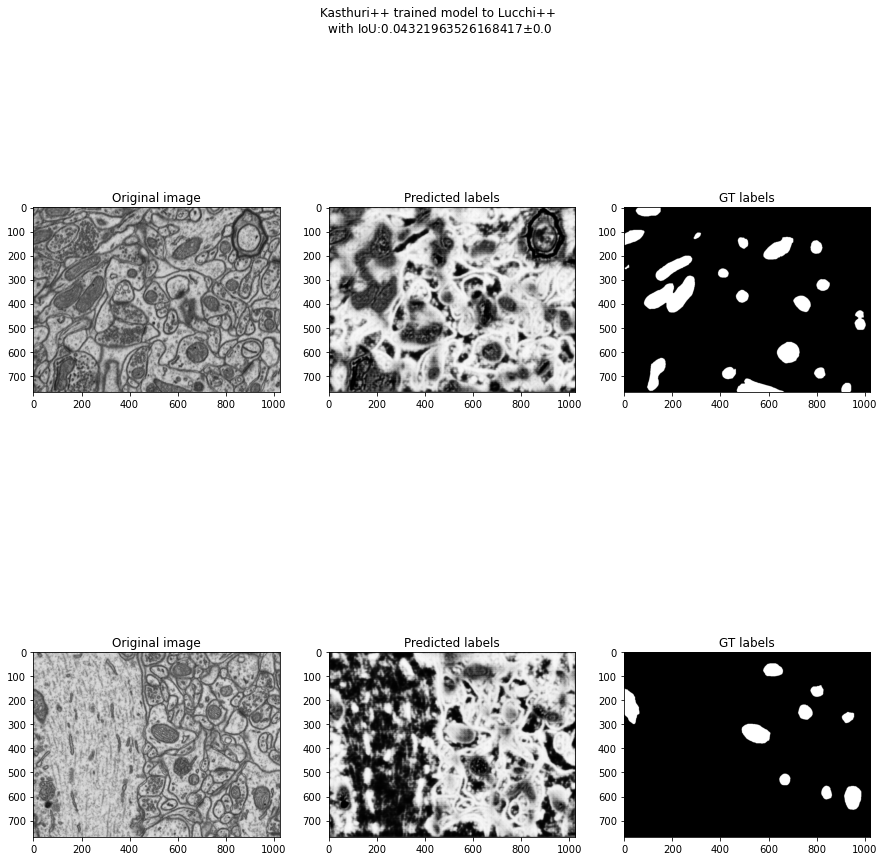

In [4]:

"""### Pretraining step
#### Pretraining step style Dataset 1
Load dataset 1 and its corresponding patches
"""

nameSavingFile=str((testName+'.xlsx'))


#fix the seed to reproduce results
set_seed(42)

print( tf.__version__ )


print('Loading data sets according to style of...'+ Target)
##### Loading the Target for pretraining according to 
# Read the list of file names
train_img1,train_lbl1=load_img(train_input_path1,train_label_path1)


# display first image
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow( train_img1[0], 'gray' )
plt.title( 'Full-size training image' );
# and its "ground truth"
plt.subplot(1, 2, 2)
plt.imshow( train_lbl1[0], 'gray' )
plt.title( 'Ground truth' );
plt.savefig('Plots/'+Target+"_training_imgs_style"+Target+".png" )

#Loading train and validation splits

train_img1, val_img1, train_lbl1, val_lbl1 = train_test_split(train_img1,
                                                        train_lbl1,
                                                        train_size=1-0.1,
                                                        test_size=0.1,
                                                        random_state=42, shuffle=False)

train_img_patches1,train_lbl_patches1=create_patches(train_img1,train_lbl1,(256,256),random_patches=random_patches,factor=factor_patches,filter=filter_Target,threshold=information_patches)


val_img_patches1,val_lbl_patches1=create_patches(val_img1,val_lbl1,(256,256),random_patches=random_patches)
#del val_img1,val_lbl1
num=3
plt.figure(figsize=(10,10))
for i in range(1,num+1,2):
  
  plt.subplot(num, 2, i)
  plt.imshow( val_img_patches1[i] ,'gray')
  plt.colorbar()
  plt.title( 'Input validation patch' );
  # and its "ground truth"
  plt.subplot(num, 2, i+1)
  plt.imshow( val_lbl_patches1[i] ,'gray')
  plt.title( 'Ground truth patch' );
plt.savefig('Plots/'+Target+"_validation_patches_style"+Target+".png" )

# Read the list of file names
train_img2,train_lbl2=load_img(train_input_path2_hm,train_label_path2_hm)

# display first image
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow( train_img2[0], 'gray' )

plt.title( 'Full-size training image' );
# and its "ground truth"
plt.subplot(1, 2, 2)
plt.imshow( train_lbl2[0], 'gray' )
plt.title( 'Ground truth' );
plt.savefig('Plots/'+Source+"_training_imgs_style"+Target+".png" )



#@title
#Loading train and validation splits

train_img2, val_img2, train_lbl2, val_lbl2 = train_test_split(train_img2,
                                                        train_lbl2,
                                                        train_size=1-0.1,
                                                        test_size=0.1,
                                                        random_state=42, shuffle=False)

"""
## Preparing the pre-training data
"""


percentage_data=1 #parameter to be changed in between 0-1 to reduce  randomly the number of annotated patches to be used during training



num=3
plt.figure(figsize=(10,10))
for i in range(1,num+1,2):
  
  plt.subplot(num, 2, i)
  plt.imshow( train_img_patches1[i] ,'gray')
  plt.colorbar()
  plt.title( 'Input training patch' );
  # and its "ground truth"
  plt.subplot(num, 2, i+1)
  plt.imshow( train_lbl_patches1[i] ,'gray')
  plt.title( 'Ground truth patch' );
plt.savefig('Plots/'+Target+"_training_patches_style"+Target+".png" )



train_img_patches2,train_lbl_patches2=create_patches(train_img2,train_lbl2,(256,256),random_patches=random_patches,factor=factor_patches,filter=filter_Source,threshold=information_patches)
#del train_img2,train_lbl2

plt.figure(figsize=(10,10))
for i in range(1,num+1,2):
  
  plt.subplot(num, 2, i)
  plt.imshow( train_img_patches2[i] ,'gray')
  plt.colorbar()
  plt.title( 'Input training patch' );
  # and its "ground truth"
  plt.subplot(num, 2, i+1)
  plt.imshow( train_lbl_patches2[i] ,'gray')
  plt.title( 'Ground truth patch' );
plt.savefig('Plots/'+Source+"_training_patches_style"+Target+".png")


val_img_patches2,val_lbl_patches2=create_patches(val_img2,val_lbl2,(256,256),random_patches=random_patches)
#del val_img2,val_lbl2
plt.figure(figsize=(10,10))
for i in range(1,num+1,2):
  
  plt.subplot(num, 2, i)
  plt.imshow( val_img_patches2[i] ,'gray')
  plt.colorbar()
  plt.title( 'Input validation patch' );
  # and its "ground truth"
  plt.subplot(num, 2, i+1)
  plt.imshow( val_lbl_patches2[i] ,'gray')
  plt.title( 'Ground truth patch' );
plt.savefig('Plots/'+Source+"_validation_patches_style"+Target+".png")

#### Self-supervised pretraining

#Create test patches to include in the pretraining
#@title
"""Now we will check the number of images and masks:"""

test_img1,test_lbl1=load_img(test_input_path1,test_label_path1)

# Display corresponding first patch at low resolution
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow( test_img1[0], 'gray' )
plt.title( 'Test image' )
# Side by side with its "ground truth"
plt.subplot(1, 2, 2)
plt.imshow( test_lbl1[0], 'gray' )
plt.title( 'Ground truth' )
plt.savefig('Plots/'+Target+"_test_imgs_style"+Target+".png" )

# Read the list of file names
test_img2,test_lbl2=load_img(test_input_path2_hm,test_label_path2_hm)


# Display corresponding first patch at low resolution
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow( test_img2[0], 'gray' )
plt.title( 'Test image' )
# Side by side with its "ground truth"
plt.subplot(1, 2, 2)
plt.imshow( test_lbl2[0], 'gray' )
plt.title( 'Ground truth' )
plt.savefig('Plots/'+Source+"_test_imgs_style"+Target+".png" )

test_img_patches1,test_lbl_patches1=create_patches(test_img1,test_lbl1,(256,256),random_patches=random_patches,factor=factor_patches,filter=filter_Target,threshold=information_patches)

test_img_patches2,test_lbl_patches2=create_patches(test_img2,test_lbl2,(256,256),random_patches=random_patches,factor=factor_patches,filter=filter_Source,threshold=information_patches)




#from SelfSupervisedLearning.general_functions import add_Gaussian_Noise,crappify
 #Here we mix both datasets so that we can perform the pretraining step
train_img_patches=train_img_patches1+train_img_patches2+test_img_patches1+test_img_patches2
val_img_patches=val_img_patches1+val_img_patches2
size_train1=len(train_img_patches1)
#del train_img_patches1,train_img_patches2,test_img_patches1,test_img_patches2,val_img_patches1,val_img_patches2

if pretrain_model1:
  
    """**There are 3 options to perform the pretraining step:**
    * `hide_fragments`: is meant to perform inpainting it hides fragments of the image by setting them to zero, we can choose the size of the fragments as well as the percentage of the image hidden
    * `add_Gaussian_Noise`: is meant to perform denoising by adding Normal Gaussian Noise N(0,$\sigma$) to the images. 
    * `crappify`: is meant to simulate superresolution so that we start by adding noise to the image and then downsizing and upsizing it.
    """

    #@title
    # We will use these patches as "ground truth" for the pretraining step
    noisy_train_img=[crappify(x,resizing_factor=factor,add_noise=True,noise_level=noise) for x in train_img_patches]
    X_train,Y_train=prepare_training_data(noisy_train_img,train_img_patches)
    #del noisy_train_img,train_img_patches
    noisy_val_img=[crappify(x,resizing_factor=factor,add_noise=True,noise_level=noise) for x in val_img_patches]
    X_val,Y_val=prepare_training_data(noisy_val_img,val_img_patches)
    #del noisy_val_img,val_img_patches

    """###Pretraining - Super resolution
    The idea is to **pretrain the network by using the noisy patches** previously created as the input and the **pretraining ground_truth would be the original images**. 
    This procedure is meant to **enhance the initial weights of our model to afterwards improve its segmentation performance and its transferability to the target domain**.
    As loss function, we use the mean squared error (MSE) between the expected and the predicted pixel values, and we also include the mean absolute error (MAE) as a control metric.
    For this step **we will use all the training data**, as even simulating scarcity of labelled data, the unlabelled data might still be available for being used in SSL super resolution.
    Furthermore we will evaluate the PSNR SSNR
    """

    #@title
    # Prepare the training data and create data generators





    evaluate_ranges(X_train)
    evaluate_ranges(Y_train)
    evaluate_ranges(X_val)
    evaluate_ranges(Y_val)



    # Display corresponding first 3 patches
    plt.figure(figsize=(15,15))
    plt.subplot(2, 2, 1)
    plt.imshow( Y_train[0,:,:,0], 'gray' )
    plt.title( ' Original patch from '+Target )
    # Side by side with its "ground truth"
    plt.subplot(2, 2, 2)
    plt.imshow( X_train[0,:,:,0], 'gray' )
    plt.title( ' Noisy training patch from '+Target )

    plt.subplot(2, 2, 3)
    plt.imshow( Y_train[size_train1+3,:,:,0], 'gray' )
    plt.title( ' Original patch from '+Source )
    # Side by side with its "ground truth"
    plt.subplot(2, 2, 4)
    plt.imshow( X_train[size_train1+3,:,:,0], 'gray' )
    plt.title( 'Noisy training patch from '+Source  )

    plt.savefig('Plots/'+"Pretraining_patches_imgs_style"+Target+".png" )

    #@title

  
    for ii in range(repetitions):

      tf.keras.backend.clear_session()
      history,model=train(X_train,Y_train,X_val,Y_val,numEpochsPretrain,1,patiencePretrain,lrPretrain,lrPretrain,batch_size_valuePretrain,schedulePretrain,model_name,optimizer_namePretrain,loss_acronymPretrain,max_poolingPretrain,train_encoder=True,plot_history=plot_history,Denoising=True,preTrain=True,check_ev=False,path_save='saved_denoised_models')
      print('Pre-trained weights are ready to be used!')

      model.save_weights(modelos_path+'/Pretrained_model_style_'+Target+'_'+str(ii)+'.h5')

      #Evaluar métricas denoising sobre entrenamiento, validación y test

      psnr_array_noise = []


      print('\n# Generate predictions for all validation samples')

      for i in range(0, len(X_val)):
        pred = X_val[i][:,:,0];
        psnr_array_noise.append(metrics.peak_signal_noise_ratio(pred, Y_val[i][:,:,0]));
      psnr_mean_noise = np.mean(psnr_array_noise)

      ssim_array_noise = []
      for i in range(0, len(X_val)):
        pred = X_val[i][:,:,0];
        ssim_array_noise.append(metrics.structural_similarity(pred, Y_val[i][:,:,0]));
      ssim_mean_noise = np.mean(ssim_array_noise)

      print("PSNR original:", psnr_mean_noise)
      print("SSIM original:", ssim_mean_noise)
      file1 = open(testName+'.txt',"a")
      import pandas as pd
      # \n is placed to indicate EOL (End of Line)
      file1.write(Target+"PSNR original: "+ str(psnr_mean_noise)+'\n')
      file1.write(Target+"SSIM original:"+ str(ssim_mean_noise)+'\n')
      file1.close() #to change file access modes
    
      #Evaluar métricas denoising sobre entrenamiento, validación y test

      psnr_array = []


      print('\n# Generate predictions for all validation samples')
      predictions = model.predict(X_val)
      for i in range(0, len(predictions)):
        pred = np.clip( predictions[i][:,:,0], a_min=0, a_max=1 );
        psnr_array.append(metrics.peak_signal_noise_ratio(pred, Y_val[i][:,:,0]));
      psnr_mean = np.mean(psnr_array)

      ssim_array = []
      for i in range(0, len(predictions)):
        pred = np.clip( predictions[i][:,:,0], a_min=0, a_max=1 );
        ssim_array.append(metrics.structural_similarity(pred, Y_val[i][:,:,0]));
      ssim_mean = np.mean(ssim_array)

      print("PSNR reconstructed:", psnr_mean)
      print("SSIM reconstructed:", ssim_mean)
      # \n is placed to indicate EOL (End of Line)
      file1 = open(testName+'.txt',"a")

      file1.write("PSNR reconstructed: "+ str(psnr_mean)+'\n')
      file1.write("SSIM reconstructed:"+ str(ssim_mean)+'\n')
      file1.close() #to change file access modes
      
      """Now it would be interesting to visualize our output data to check what does the output of our net look like. """

        #@title
      try:
        print('predictions shape:', predictions.shape)
        # Display corresponding first 3 patches
        plt.figure(figsize=(15,15))
        plt.subplot(3, 3, 1)
        plt.imshow( Y_val[0,:,:,0], 'gray' )
        plt.title( 'Validation original image' )
        # Side by side with its "ground truth"
        plt.subplot(3, 3, 2)
        plt.imshow( X_val[0,:,:,0], 'gray' )
        plt.title( 'Image with added noise' )
        # and its prediction
        plt.subplot(3, 3, 3)
        plt.imshow( predictions[0,:,:,0], cmap='gray' )
        plt.title( 'Denoised image' )

        plt.subplot(3, 3, 4)
        plt.imshow( Y_val[size_train1+3,:,:,0], 'gray' )
        plt.title( 'Validation original image' )
        # Side by side with its "ground truth"
        plt.subplot(3, 3, 5)
        plt.imshow( X_val[size_train1+3,:,:,0], 'gray' )
        plt.title( 'Image with added noise' )
        # and its prediction
        plt.subplot(3, 3, 6)
        plt.imshow( predictions[size_train1+3,:,:,0], cmap= 'gray' )
        plt.title( 'Denoised image' )

        plt.subplot(3, 3, 7)
        plt.imshow( Y_val[-1,:,:,0], 'gray' )
        plt.title( 'Validation original image' )
        # Side by side with its "ground truth"
        plt.subplot(3, 3, 8)
        plt.imshow( X_val[-1,:,:,0], 'gray' )
        plt.title( 'Image with added noise' )
        # and its prediction
        plt.subplot(3, 3, 9)
        plt.imshow( predictions[-1,:,:,0], cmap= 'gray' )
        plt.title( 'Denoised image' )
        plt.savefig('Plots/'+'Pretraining_predictions_style'+Target+str(ii)+'.png')
      except:
        print('Problem when printing superresolution predictions it requires to use X_train,X_val...')

      #del model
      ##del X_train,X_val,Y_train,Y_val

train_img2,train_lbl2=load_img(train_input_path2_hm,train_label_path2_hm)

train_img2, val_img2, train_lbl2, val_lbl2 = train_test_split(train_img2,
                                                        train_lbl2,
                                                        train_size=1-0.1,
                                                        test_size=0.1,
                                                        random_state=42, shuffle=False)

train_img_patches2,train_lbl_patches2=create_patches(train_img2,train_lbl2,(256,256),random_patches=random_patches,factor=factor_patches,filter=filter_Source,threshold=information_patches)

if noisy_input:train_img_patches2=[crappify(x,resizing_factor=factor,add_noise=True,noise_level=noise) for x in train_img_patches2]
#del train_img2,train_lbl2

val_img_patches2,val_lbl_patches2=create_patches(val_img2,val_lbl2,(256,256),random_patches=random_patches)
if noisy_input:val_img_patches2=[crappify(x,resizing_factor=factor,add_noise=True,noise_level=noise) for x in val_img_patches2]
#del val_img2,val_lbl2
#@title
X_train,Y_train=prepare_training_data(train_img_patches2,train_lbl_patches2)
X_val,Y_val=prepare_training_data(val_img_patches2,val_lbl_patches2)
#del train_img_patches2,train_lbl_patches2,val_img_patches2,val_lbl_patches2
#@title
evaluate_ranges(X_train)
evaluate_ranges(Y_train)
evaluate_ranges(X_val)
evaluate_ranges(Y_val)


#@title

total_seg100=[]
total_prec100=[]
#from SelfSupervisedLearning.DenoiSeg_functions import threshold_optimization
test_img1,test_lbl1=load_img(test_input_path1,test_label_path1)
if noisy_input:test_img1=[crappify(x,resizing_factor=factor,add_noise=True,noise_level=noise) for x in test_img1]
X_test,Y_test,test_lbl=prepare_test_data(test_img1,test_lbl1)

#del test_img1,test_lbl1

for i in range(0,repetitions):
    model = modelos_path+'/Pretrained_model_style_'+Target+'_'+str(i)+'.h5'
    tf.keras.backend.clear_session()
    history,model2=train(X_train,Y_train,X_val,Y_val,numEpochs,1,patience,lr,lr*1e-1,batch_size_value,schedule,model_name,optimizer_name,loss_acronym,max_pooling,train_encoder=train_encoder,preTrain=False,Denoising=False,pre_load_weights=True,pretrained_model=model,plot_history=plot_history,bottleneck_freezing=bottleneck_freezing,check_ev=True,path_save='saved_Source_models',X_test=X_test,Y_test=Y_test,train_decoder=train_decoder,Source=Source,Target=Target)
    # Evaluate the model on the test data using `evaluate`
    model2.save_weights(Source+'TO'+Target+'_FineTunedModel'+str(i)+'.h5')
    print('\n# Evaluate on test data with all training data in loop:',i)

#del X_train,Y_train,X_val,Y_val,X_test,test_lbl
test_img2,test_lbl2=load_img(test_input_path2_hm,test_label_path2_hm)
if noisy_input:test_img2=[crappify(x,resizing_factor=factor,add_noise=True,noise_level=noise) for x in test_img2]
X_test,_,test_lbl=prepare_test_data(test_img2,test_lbl2)
#del test_img2,test_lbl2

IoU_Source2Source=[]
model_input_filenames2 = [x for x in os.listdir() if x.endswith(".h5") and x.startswith(Source)]
for w in  model_input_filenames2 :
  model2.load_weights(w)
  IoU_Source2Source.append(evaluate_test(X_test,test_lbl,model2))
  

print('The average SEG in test set is: ',IoU_Source2Source)
df['IoU Source-Source']=np.mean(IoU_Source2Source)
df['Std Source-Source']=np.std(IoU_Source2Source)
try:
    file1 = open(testName + '.txt',"a")
    file1.write('Source-Source IoU:')
    file1.write(str(np.mean(IoU_Source2Source))+'\n')
    file1.write('Source-Source std:')
    file1.write(str(np.std(IoU_Source2Source))+'\n')
    

   
except:
    print('No se ha podido copiar en el txt el IoU en el dataset 2')
#@title
file1.close() #to change file access modes
predictions=[]
for i in range(0,len(X_test[0:5])):
      #print('Evaluating test image',i)
      normalizedImg = X_test[i][:,:,:]
      prediction = model2.predict(normalizedImg[np.newaxis,:,:]);
      image=prediction[0,:,:,:]>0.5;
      predictions.append(image);
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.imshow(X_test[0][:,:,0], 'gray')
plt.title('Original image')
plt.subplot(2,3,2)
plt.imshow(predictions[0][:,:,0], 'gray')
plt.title('Predicted labels')
plt.subplot(2,3,3)
plt.imshow(test_lbl[0].astype(int)[:,:], 'gray')
plt.title('GT labels')
plt.subplot(2,3,4)
plt.imshow(X_test[len(predictions)-1][:,:,0], 'gray')
plt.title('Original image')
plt.subplot(2,3,5)
plt.imshow(predictions[len(predictions)-1][:,:,0], 'gray')
plt.title('Predicted labels')
plt.subplot(2,3,6)
plt.imshow(test_lbl[len(predictions)-1].astype(int)[:,:], 'gray')
plt.title('GT labels')
plt.suptitle(Source+' trained model to '+Source +'\n with IoU:'+str(np.mean(IoU_Source2Source))+'$\pm$'+str(np.std(IoU_Source2Source)))

plt.savefig('Plots/'+'Model_Source_Predictions_Source_hm.png')
#del X_test,Y_test,test_lbl
test_img1,test_lbl1=load_img(test_input_path1,test_label_path1)
if noisy_input:test_img1=[crappify(x,resizing_factor=factor,add_noise=True,noise_level=noise) for x in test_img1]
X_test,Y_test,test_lbl=prepare_test_data(test_img1,test_lbl1)
#del test_img1,test_lbl1

IoU_Source2Target=[]
for w in  model_input_filenames2 :
  model2.load_weights(w)

  IoU_Source2Target.append(evaluate_test(X_test,test_lbl,model2,save_img=True,path='Test_predictions'))

print('The average SEG in test set is: ',np.mean(IoU_Source2Target))
df['IoU Source-Target']=np.mean(IoU_Source2Target)
df['Std Source-Target']=np.std(IoU_Source2Target)

try:
    file1 = open(testName + '.txt',"a")
    file1.write('Source-Target IoU:')
    file1.write(str(np.mean(IoU_Source2Target))+'\n')
    file1.write('Source-Target std:')
    file1.write(str(np.std(IoU_Source2Target))+'\n')

    
except:
    print('No se ha podido copiar en el txt el IoU en el dataset 2')
#@title
file1.close() #to change file access modes
predictions=[]
for i in range(0,len(X_test)):
    #print('Evaluating test image',i)
    normalizedImg = X_test[i][:,:,:]
    prediction = model2.predict(normalizedImg[np.newaxis,:,:]);
    image=prediction[0,:,:,:];
    predictions.append(image);
try:
  gr_im= Image.fromarray((predictions[0][:,:,0]*255).astype(np.uint8)).save(Source+'TO'+Target+'image.png')
except:
  print('Gray scale image hasnt been saved')
plt.figure(figsize=(15,15))
plt.imshow(X_test[0][:,:,0], 'gray')
plt.savefig('Plots/'+'Model_Source_img.png')
plt.figure(figsize=(15,15))
plt.imshow(predictions[0][:,:,0], 'gray')
plt.savefig('Plots/'+'Model_Source_Prediction.png')
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.imshow(X_test[0][:,:,0], 'gray')
plt.title('Original image')
plt.subplot(2,3,2)
plt.imshow(predictions[0][:,:,0], 'gray')
plt.title('Predicted labels')
plt.subplot(2,3,3)
plt.imshow(test_lbl[0].astype(int)[:,:], 'gray')
plt.title('GT labels')
plt.subplot(2,3,4)
plt.imshow(X_test[len(predictions)-1][:,:,0], 'gray')
plt.title('Original image')
plt.subplot(2,3,5)
plt.imshow(predictions[len(predictions)-1][:,:,0], 'gray')
plt.title('Predicted labels')
plt.subplot(2,3,6)
plt.imshow(test_lbl[len(predictions)-1].astype(int)[:,:], 'gray')
plt.title('GT labels')
plt.suptitle(Source+' trained model to '+Target +'\n with IoU:'+str(np.mean(IoU_Source2Target))+'$\pm$'+str(np.std(IoU_Source2Target)))
plt.savefig('Plots/'+'Model_Source_Predictions_Target.png')
df.to_csv('/data/jpastor/Nuevas_ejecuciones/Resultados_hm.csv',mode='a',header=True)
